<a href="https://colab.research.google.com/github/remusezequiel/Fis_Colab/blob/main/tp_computacional_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#13ddff'> Ezequiel Remus </font>

<font color='#13ddff'> Marty Arroyo Sanchez </font>

<font size='14px' color='#e35a23'> Enunciado al Problema </font>

Se tiene un sistema de tres particulas de masa $m$ unidas a un aro de radio $R$
mediante tres resortes idénticos de constante elástica $k$ y longitud natural $l_0$.

- a) Escriba las ecuaciones de Newton para cada una de las tres particulas indicando claramente las aproximaciónes que realiza. Escriba las ecuaciónes en forma matricial.
- b) Halle las frecuencias naturales de oscilación y los modos normales. Esquematizar los modos.
- c) Escriba las ecuaciónes de movimiento de las masas para todo tiempo.

- a) Para las ecuaciónes de Newton, vamos a tomar como los angulos de estiramiento a $\psi_i$ los cuales van a ser funciónes del tiempo. 

Tomando como positivo el sentido de giro antihorario y la perturbació a partir de la posicion de equilibrio, nos quedan las siguientes ecuaciónes de Newton.

## Ec. Newton:
- 1) $m R \ddot{\psi}_1 = k[(\psi_2 - \psi_1)R - l_0] - k[(\psi_1 - \psi_3)R-l_0]$
- 2) $m R \ddot{\psi}_2 = - k[(\psi_2 - \psi_1)R - l_0] + k[(\psi_3 - \psi_2)R-l_0]$
- 3) $m R \ddot{\psi}_3 = k[(\psi_2 - \psi_1)R - l_0] - k[(\psi_1 - \psi_3)R-l_0]$

Luego, de (1), (2), (3) se desprenden:

- (4) $\ddot{\psi}_1 = \frac{-k}{m} (2 \psi_1 - \psi_2 - \psi_3) $
- (5) $\ddot{\psi}_2 = \frac{-k}{m} (- \psi_1 + 2\psi_2 - \psi_3)$
- (6) $\ddot{\psi}_3 = \frac{-k}{m} (- \psi_1 - \psi_2  + \psi_3)$

Y esto matricialmente quedaria de la forma:
$$\ddot{\overline{\psi}} + \frac{k}{m}\mathbb{M}\overline{\psi} = \pmatrix{\ddot{\psi_1} \\ \ddot{\psi_2} \\ \ddot{\psi_3}} + \frac{k}{m} \pmatrix{2 & -1 & -1 \\ -1 & 2 & -1 \\ -1 & -1 & 2} \pmatrix{\psi_1 \\ \psi_2 \\ \psi_3}$$










- (b) Aplicando $\psi_i(t) = A_i e{\omega_i t}$ como solución al sistema, se llega a que las frecuencias de los modos de oscilación, las podremos calcular a partir del polinomio caracteristico que sale del determinante:

$$det\left(\frac{k}{m}\mathbb{M} - \omega^2 \mathbb{I} \right) = 0$$

A partir de esto, se obtienen las siguientes frecuencias:
 - $\omega_1 = 0$
 - $\omega_2 = \omega_3 = \sqrt{\frac{3k}{m}}$
   
Para calcular los autovectores, calculamos el nucleo:   
$$V_{\omega_i} =Ker\left(\frac{k}{m}\mathbb{M} - \omega_i^2 \mathbb{I} \right)$$

Resolviendo para cada autovalor obtenido, se obtiene la siguiente base de autovectores. 

$$V_{\omega} = \left\{ \pmatrix{ 1 \\ 1 \\ 1}, \pmatrix{ 0 \\ 1 \\ -1} , \pmatrix{ 1 \\ 0 \\ -1} \right\}$$

Los autovectores y autovalores obtenidos identifican a los modos normales del movimiento. 

- El modo de $\omega_1 = 0$ nos da un movimiento circular "rigido", sin que los resortes se estiren ni contraigan.
- Los modos con frecuencia $\omega_2$ y $\omega_3$ nos dan movimientos en fase y contrafase de una masa contra la otra, donde para una de las frecuencias una masa se queda estatica, otra comprime un resorte una unidad y la otra se estira y para la otra una se deja estatica y abmas comprimen un resorte y estiran los otros dos.

- (c) Luego, se obtiene que las ecuaciónes para cada modo son:   

- (7) $$\overline{\psi} (t) = A \pmatrix{ 1 \\ 0 \\ -1} \cos{(\sqrt{\frac{3k}{m}} t + \phi_1)} + B \pmatrix{ 0 \\ 1 \\ -1} \cos{(\sqrt{\frac{3k}{m}} t + \phi_2)} + C \pmatrix{ 1 \\ 1 \\ 1} t + \pmatrix{ \frac{\pi}{6} \\ \frac{5\pi}{6} \\ \frac{3\pi}{2}}$$

In [10]:
# @title Importación de Librerias

import numpy as np

import matplotlib.pyplot as plt

from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML

import ipywidgets as iwy 


In [11]:
# @markdown Acá se presenta el movimiento lineal dado por la circulacipon rigida de las masas.
def modo_1(k = 30.0, A=0.1): 

  # aca le estamos diciendo que genere equispaciadamente 250 tiempos entre 0 y 5seg
  t = np.linspace(0,5,250) 

  psi_a1 = A * t + (np.pi/6) 
  psi_b1 = A * t  + ((5/6)*np.pi)
  psi_c1 = A * t  + ((3/2)*np.pi)

  plt.suptitle('Modo 1', fontsize=14, y=1)
  
  plt.xlabel('tiempo [s]', fontsize=12)
  plt.ylabel('Desp. osc. longitudinal [m]', fontsize=12)
  
  return (plt.plot(t, psi_a1), plt.plot(t, psi_b1), plt.plot(t, psi_c1)) 

iwy.interact(modo_1, k=(1,60,5), A= (0,1,0.1))  

plt.show()

interactive(children=(IntSlider(value=30, description='k', max=60, min=1, step=5), FloatSlider(value=0.1, desc…

In [12]:
# @markdown Primer movimiento a contra fase
def modo_2(m=0.5,k = 30.0, A=0.1): 

  # aca le estamos diciendo que genere equispaciadamente 250 tiempos entre 0 y 5seg
  t = np.linspace(0,5,250) 
  omega = np.sqrt((3*k)/m)
  av = [0, 1, -1]     

  psi_a2 = A*av[0] * np.cos(omega *t)  + (np.pi/6) 
  psi_b2 = A*av[1] * np.cos(omega *t)  + ((5/6)*np.pi)
  psi_c2 = A*av[2] * np.cos(omega *t)  + ((3/2)*np.pi)

  plt.suptitle('Modo 2', fontsize=14, y=1)
  
  plt.xlabel('tiempo [s]', fontsize=12)
  plt.ylabel('Desp. osc. longitudinal [m]', fontsize=12)
  
  return (plt.plot(t, psi_a2), plt.plot(t, psi_b2), plt.plot(t, psi_c2)) 

iwy.interact(modo_2, m=(0,4,0.5),  k=(1,60,5), A= (0,1,0.1))  
plt.show()

interactive(children=(FloatSlider(value=0.5, description='m', max=4.0, step=0.5), IntSlider(value=30, descript…

In [13]:
# @markdown Segundo movimiento a contra fase
def modo_3(m=0.5,k = 30.0, A=0.1): 

  # aca le estamos diciendo que genere equispaciadamente 250 tiempos entre 0 y 5seg
  t = np.linspace(0,5,250) 
  omega = np.sqrt((3*k)/m)
  av_m3 = [1, 0, -1]     

  psi_a3 = A*av_m3[0] * np.cos(omega *t)  + (np.pi/6) 
  psi_b3 = A*av_m3[1] * np.cos(omega *t)  + ((5/6)*np.pi)
  psi_c3 = A*av_m3[2] * np.cos(omega *t)  + ((3/2)*np.pi)

  plt.suptitle('Modo 3', fontsize=14, y=1)
  
  plt.xlabel('tiempo [s]', fontsize=12)
  plt.ylabel('Desp. osc. longitudinal [m]', fontsize=12)
  
  return (plt.plot(t, psi_a3), plt.plot(t, psi_b3), plt.plot(t, psi_c3)) 

iwy.interact(modo_3, m=(0,4,0.5),  k=(1,60,5), A= (0,1,0.1))  
plt.show()

interactive(children=(FloatSlider(value=0.5, description='m', max=4.0, step=0.5), IntSlider(value=30, descript…

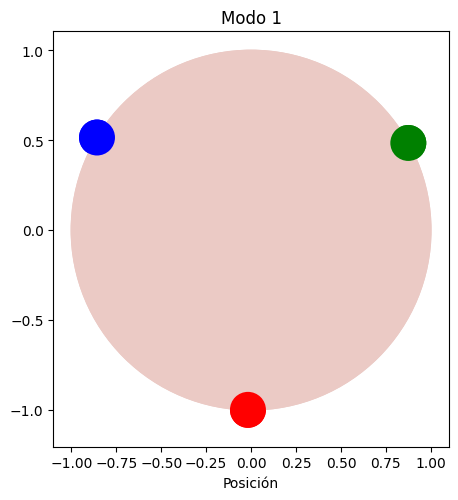

In [14]:
# @title Animación del Modo 1

t = np.linspace(0,5,250) 

# @markdown Definimos un tamaño para la figura
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 5.5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
plt.xlabel('Posición');
plt.title('Modo 1');

# @markdown Definimos 4 circulos que van a representar al sistema.
# @markdown Los identificaremos por colores. 
patch_0 = plt.Circle( (0, 0), 1, color='#ebcac5')
patch_1 = plt.Circle((np.cos((np.pi/6)), np.sin((np.pi/6))), 0.1, fc='g')
patch_2 = plt.Circle(((np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))), 0.1, fc='b')
patch_3 = plt.Circle(((np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))), 0.1, fc='r')

def init():
    patch_0.center = (0,0)
    ax.add_patch(patch_0)

    patch_1.center = (np.cos((np.pi/6)), np.sin((np.pi/6)))
    ax.add_patch(patch_1)


    patch_2.center = (np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))
    ax.add_patch(patch_2)


    patch_3.center = (np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))
    ax.add_patch(patch_3)

    plt.axis('scaled')

    return patch_0, patch_1, patch_2, patch_3,


# @markdown $\psi_{a1} = 0.1 t + (\frac{\pi}{6})$ 

# @markdown $\psi_{b1} = 0.1 t + (\frac{5 \pi}{6})$

# @markdown $\psi_{c1} = 0.1 t + (\frac{3 \pi}{2})$


def animate(i):

    x_1, y_1 = patch_1.center
    x_2, y_2 = patch_2.center
    x_3, y_3 = patch_3.center

    x_1 = np.cos(np.pi/6 + np.radians(i))  
    y_1 = np.sin(np.pi/6 + np.radians(i)) 

    x_2 = np.cos((5/6)*np.pi + np.radians(i))
    y_2 = np.sin((5/6)*np.pi + np.radians(i))

    x_3 = np.cos((3/2)*np.pi + np.radians(i))
    y_3 = np.sin((3/2)*np.pi + np.radians(i))
    

    patch_1.center = (x_1, y_1)
    patch_2.center = (x_2, y_2)
    patch_3.center = (x_3, y_3)
    
    plt.axis('scaled')
    return patch_1, patch_2, patch_3

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=30,
                               blit=True)
anim


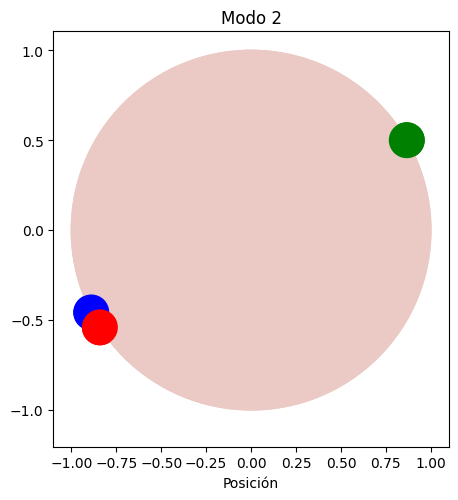

In [15]:
# @title Animación del Modo 2 
 
# @markdown Tomamos la posición inicial para las masas como las tomamos anteriormente
# @markdown con la función **init**.


t = np.linspace(0,5,250) 

# @markdown Definimos un tamaño para la figura
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(6, 5.5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
plt.xlabel('Posición');
plt.title('Modo 2');

# @markdown Definimos 4 circulos que van a representar al sistema.
# @markdown Los identificaremos por colores. 
patch_0 = plt.Circle( (0, 0), 1, color='#ebcac5')
patch_1 = plt.Circle((np.cos((np.pi/6)), np.sin((np.pi/6))), 0.1, fc='g')
patch_2 = plt.Circle(((np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))), 0.1, fc='b')
patch_3 = plt.Circle(((np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))), 0.1, fc='r')

def init():
    patch_0.center = (0,0)
    ax.add_patch(patch_0)

    patch_1.center = (np.cos((np.pi/6)), np.sin((np.pi/6)))
    ax.add_patch(patch_1)

    patch_2.center = (np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))
    ax.add_patch(patch_2)

    patch_3.center = (np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))
    ax.add_patch(patch_3)

    plt.axis('scaled')

    return patch_0, patch_1, patch_2, patch_3,

# @markdown $\psi_{2} =  A \pmatrix{ 0 \\ 1 \\ -1} \cos{(\sqrt{\frac{3k}{m}} t + \phi_3)}$ 


def animate(i):

    x_1, y_1 = patch_1.center
    x_2, y_2 = patch_2.center
    x_3, y_3 = patch_3.center

    x_2 = np.cos((5/6)*np.pi + np.cos(2*np.radians(i)))
    y_2 = np.sin((5/6)*np.pi + np.cos(2*np.radians(i)))

    x_3 = np.cos((3/2)*np.pi - np.cos(2*np.radians(i)))
    y_3 = np.sin((3/2)*np.pi - np.cos(2*np.radians(i)))
    

    patch_1.center = (x_1, y_1)
    patch_2.center = (x_2, y_2)
    patch_3.center = (x_3, y_3)
    
    plt.axis('scaled')
    return patch_1, patch_2, patch_3


anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=30,
                               blit=True)
anim



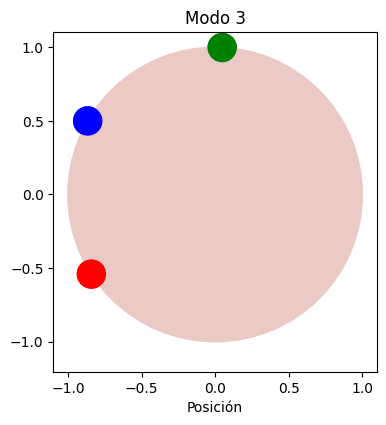

In [16]:
# @title Animación del Modo 3 
 
# @markdown Tomamos la posición inicial para las masas como las tomamos anteriormente
# @markdown con la función **init**.


# @markdown Definimos un tamaño para la figura
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(5, 4.5)

ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
plt.xlabel('Posición');
plt.title('Modo 3');

# @markdown Definimos 4 circulos que van a representar al sistema.
# @markdown Los identificaremos por colores. 
patch_0 = plt.Circle( (0, 0), 1, color='#ebcac5')
patch_1 = plt.Circle((np.cos((np.pi/6)), np.sin((np.pi/6))), 0.1, fc='g')
patch_2 = plt.Circle(((np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))), 0.1, fc='b')
patch_3 = plt.Circle(((np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))), 0.1, fc='r')

def init():
    patch_0.center = (0,0)
    ax.add_patch(patch_0)

    patch_1.center = (np.cos((np.pi/6)), np.sin((np.pi/6)))
    ax.add_patch(patch_1)

    patch_2.center = (np.cos((5/6)*np.pi), np.sin((5/6)*np.pi))
    ax.add_patch(patch_2)

    patch_3.center = (np.cos((3/2)*np.pi), np.sin((3/2)*np.pi))
    ax.add_patch(patch_3)

    plt.axis('scaled')

    return patch_0, patch_1, patch_2, patch_3,

# @markdown $\psi_{2} =  A \pmatrix{ 1 \\ 0 \\ -1} \cos{(\sqrt{\frac{3k}{m}} t + \phi_2)}$ 


def animate(i):

    x_1, y_1 = patch_1.center
    x_2, y_2 = patch_2.center
    x_3, y_3 = patch_3.center

    x_1 = np.cos(np.pi/6 + np.cos(2*np.radians(i)))  
    y_1 = np.sin(np.pi/6 + np.cos(2*np.radians(i))) 

    x_3 = np.cos((3/2)*np.pi - np.cos(2*np.radians(i)))
    y_3 = np.sin((3/2)*np.pi - np.cos(2*np.radians(i)))
    

    patch_1.center = (x_1, y_1)
    patch_2.center = (x_2, y_2)
    patch_3.center = (x_3, y_3)
    
    plt.axis('scaled')
    return patch_1, patch_2, patch_3


anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=30,
                               blit=True)
anim

# Referencias

- [Circulos en matplotlib](https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html)
- [Documentación Numpy](https://numpy.org/doc/stable/)
- [Documentación Matplotlib](https://matplotlib.org/2.0.0/examples/index.html)
- [Documentación ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)
- [Documentación ipython](https://ipython.org/)
- [Sintaxis de Markdown](https://markdown.es/sintaxis-markdown/)